## 🚢 Titanic Dataset Column Explanations

- survived: Target column – 1 means the passenger survived, 0 means they did not.

- pclass: Passenger class – 1 is first class, 2 is second, 3 is third. Lower numbers indicate higher social status.

- sex: Gender of the passenger – male or female.

- age: Age of the passenger in years. This column may contain missing values.

- sibsp: Number of siblings or spouses aboard the Titanic with the passenger.

- parch: Number of parents or children aboard with the passenger.

- fare: The ticket fare the passenger paid.

- embarked: Port the passenger boarded from – C (Cherbourg), Q (Queenstown), or S (Southampton).

- class: Text version of pclass – “First”, “Second”, or “Third”. This is a derived column.

- who: Category describing the passenger as “man”, “woman”, or “child”, based on age and sex.

- adult_male: Boolean column – True if the passenger is an adult male, otherwise False.

- deck: Cabin deck the passenger was on, represented by letters (A, B, C, etc.). This column has many missing values.

- embark_town: Full name of the town where the passenger boarded – Cherbourg, Queenstown, or Southampton.

- alive: Text version of the survived column – “yes” if the passenger survived, “no” if not.

- alone: Boolean column – True if the passenger had no family members aboard (i.e., sibsp + parch = 0).

# **Data Collection**

In [ ]:
# Titanic EDA - Day 1


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# View first 5 rows
print("🔍 Dataset Preview:")
df.head()


🔍 Dataset Preview:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Data Preprocessing**

In [ ]:
# Check null values
print("\n🧼 Missing Values:")
print(df.isnull().sum())



🧼 Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


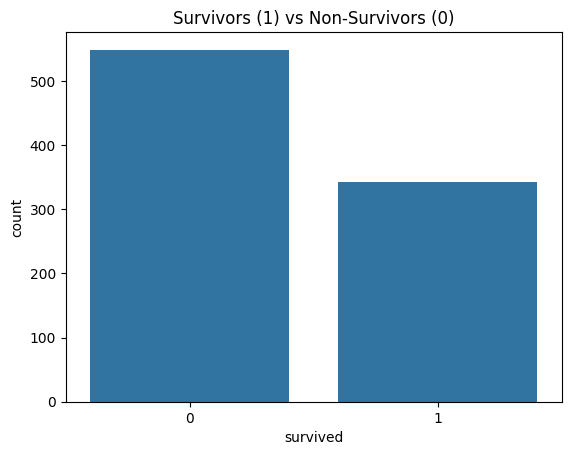

In [ ]:
# Plot survival count
sns.countplot(x='survived', data=df)
plt.title("Survivors (1) vs Non-Survivors (0)")
plt.show()


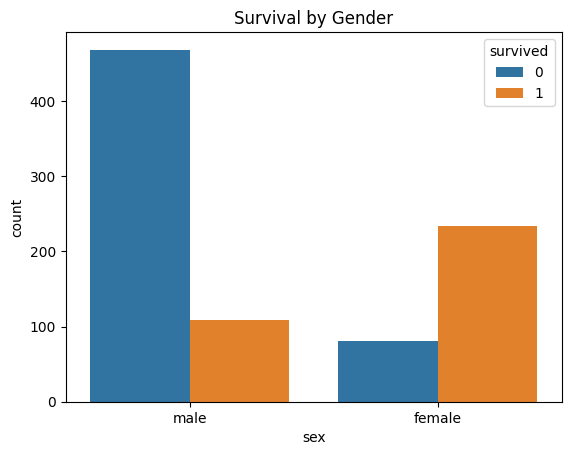

In [ ]:
# Gender-wise survival
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

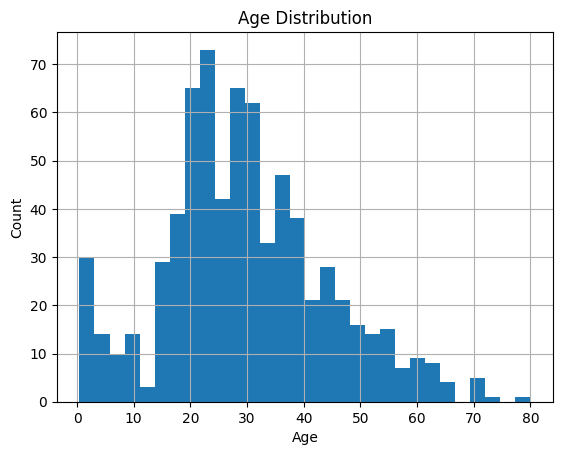

In [ ]:
# Age distribution
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

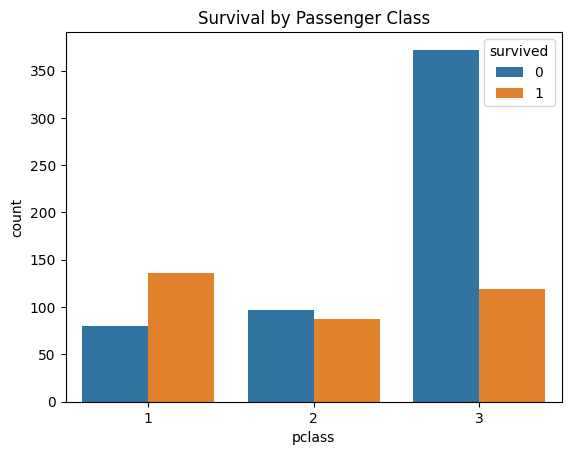

In [ ]:
# Survival by class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# **Dropping irrelevant columns**
- dropping unnecessary features helps avoid noise and reduces model complexity

In [ ]:
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)


# **Handeling missing values**

ML models don’t work with missing values. You need to handle them:

age: Fill with median (robust to outliers)

embarked: Fill with mode (most common value)

This ensures the model receives complete data without distortions.

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipython-input-8-1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# **Encode categorical variables**
ML models work with numbers — not text. So:

- sex is converted to 0 (female) and 1 (male)

- embarked is converted to numeric values too

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # male=1, female=0
df['embarked'] = le.fit_transform(df['embarked'])  # C=0, Q=1, S=2

# **Feature scaling**
Many ML algorithms (like SVM, KNN, Logistic Regression) are sensitive to the scale of numbers.

- fare might go up to 500

- age might go up to 80

We scale both to a standard range (mean = 0, std = 1) using StandardScaler.

This makes training faster and more accurate.

Scaling doesn't change:
- It doesn't change relationships or patterns in the data

- It just reformats the numbers to help the model learn better

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# **Final check before training**

In [ ]:
print(df.head())

   survived  pclass  sex       age  sibsp  parch      fare  embarked  alone
0         0       3    1 -0.565736      1      0 -0.502445         2  False
1         1       1    0  0.663861      1      0  0.786845         0  False
2         1       3    0 -0.258337      0      0 -0.488854         2   True
3         1       1    0  0.433312      1      0  0.420730         2  False
4         0       3    1  0.433312      0      0 -0.486337         2   True


In [ ]:
print(df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


# **Import Libraries**

- LogisticRegression — the model we’ll train

- train_test_split — splits data into training and testing sets

- accuracy_score, confusion_matrix, classification_report — used to evaluate how well the model performs


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **Define Features (x) and Target (y)**

We're predicting survival, so:

- X = all columns except the target (survived)

- y = the target column we want to predict (0 = not survived, 1 = survived)



In [ ]:
X = df.drop("survived", axis=1)
y = df["survived"]


# **Split the dataset**

We divide the dataset into:

- 80% for training (X_train, y_train)

- 20% for testing (X_test, y_test)

This lets us test the model on unseen data to evaluate real performance.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train the Model**

### **Logistic Regression**

We’re creating a logistic regression model and training it on the training data.

The .fit() function learns the relationship between input features and survival.



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **Make Predictions**

Now that the model is trained, we use it to predict survival outcomes for the test data.

In [ ]:
y_pred = model.predict(X_test)


# **Evaluate the Model**

- Accuracy tells you how many predictions were correct

- Confusion Matrix breaks down true vs false positives/negatives

- Classification Report shows precision, recall, and F1-score for each class

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Train Decision tree**

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.7821229050279329
Confusion Matrix:
 [[84 21]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



# **Train Random Forest**

In [ ]:
rforest = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rforest.fit(X_train, y_train)
y_pred_forest = rforest.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[94 11]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# **Feature Importance ( Random Forest )**

In [ ]:
import pandas as pd
feature_imp = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_imp)


Feature Importance:
 sex         0.459558
fare        0.179795
pclass      0.128853
age         0.103379
sibsp       0.045995
parch       0.034486
embarked    0.029725
alone       0.018210
dtype: float64


# **Visualize Feature Importance**

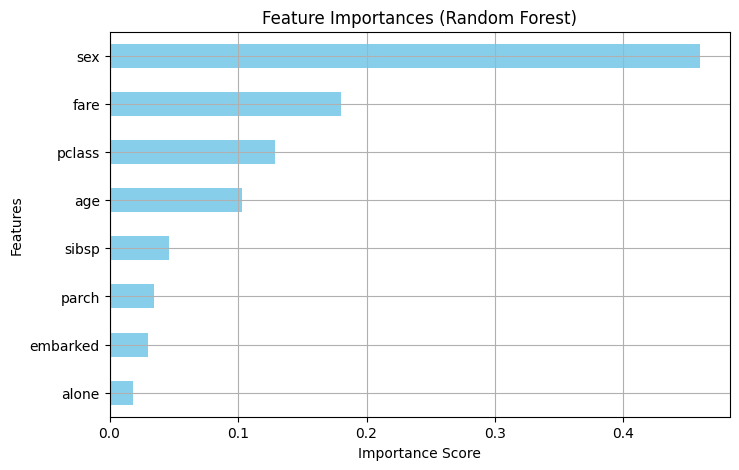

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_imp.sort_values().plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


# **Compare Training vs Test Accuracy (Checking overfitting)**

In [ ]:
# Already trained model: rforest
train_pred = rforest.predict(X_train)
test_pred = rforest.predict(X_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 0.8623595505617978
Test Accuracy: 0.8100558659217877


# **Save the Model**

In [ ]:
import joblib

# Save your current Random Forest model
joblib.dump(rforest, 'rf_model_depth5.pkl')
print("Model saved as rf_model_depth5.pkl")


Model saved as rf_model_depth5.pkl
